<a href="https://colab.research.google.com/github/jdmartinev/ArtificialIntelligenceIM/blob/main/Lecture02/notebooks/L02_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

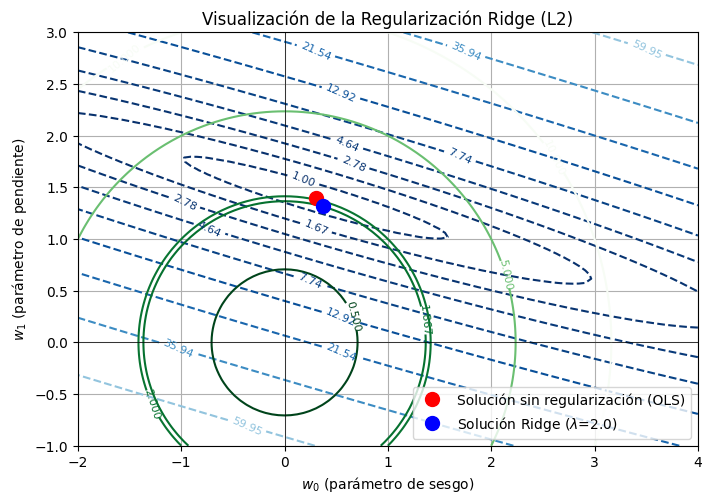

In [ ]:
# --- 1. Configuración del Problema (Sin cambios) ---

# Generamos datos sintéticos para tener una función de error
np.random.seed(42)
X = np.array([[1, 1.5], [1, 2.5], [1, 3.5], [1, 4.5]])
y = np.array([2, 5, 4, 7])

# Solución de Mínimos Cuadrados Ordinarios (sin regularización)
w_ls = np.linalg.inv(X.T @ X) @ X.T @ y

# Parámetro de regularización
lambda_reg = 2.0

# Solución de Ridge Regression
identity_matrix = np.identity(X.shape[1])
w_ridge = np.linalg.inv(X.T @ X + lambda_reg * identity_matrix) @ X.T @ y


# --- 2. Crear el Espacio de Parámetros (Sin cambios) ---

# Creamos una malla de puntos para w0 y w1
w0_vals = np.linspace(-2, 4, 100)
w1_vals = np.linspace(-1, 3, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# --- 3. Calcular el Error y la Regularización en la Malla (Sin cambios) ---

# Función de Error Cuadrático (MSE)
mse = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_ij = np.array([W0[i, j], W1[i, j]])
        mse[i, j] = np.mean((y - X @ w_ij)**2)

# Función de Regularización L2
l2_penalty = W0**2 + W1**2

# --- 4. Graficar ---

plt.figure(figsize=(8, 8))
plt.grid(True)

# Graficar las curvas de nivel del Error (MSE)
contour_mse = plt.contour(W0, W1, mse, levels=np.logspace(0, 2, 10), cmap='Blues_r', linestyles='dashed')
plt.clabel(contour_mse, inline=1, fontsize=8)


# --- INICIO DE LA CORRECCIÓN ---
# 1. Definir los niveles base y el nivel específico de la solución Ridge
l2_base_levels = [0.5, 2, 5, 10]
ridge_norm_level = w_ridge @ w_ridge

# 2. Combinar los niveles en una sola lista
all_l2_levels = l2_base_levels + [ridge_norm_level]

# 3. Eliminar duplicados y ordenar la lista para evitar el error
final_l2_levels = sorted(list(set(all_l2_levels)))
# --- FIN DE LA CORRECCIÓN ---


# Graficar las curvas de nivel de la Regularización (L2) con la lista corregida
contour_l2 = plt.contour(W0, W1, l2_penalty, levels=final_l2_levels, cmap='Greens_r')
plt.clabel(contour_l2, inline=1, fontsize=8)

# Marcar los puntos importantes
plt.plot(w_ls[0], w_ls[1], 'ro', markersize=10, label='Solución sin regularización (OLS)')
plt.plot(w_ridge[0], w_ridge[1], 'bo', markersize=10, label=f'Solución Ridge ($\lambda$={lambda_reg})')

# Estilo del gráfico
plt.xlabel('$w_0$ (parámetro de sesgo)')
plt.ylabel('$w_1$ (parámetro de pendiente)')
plt.title('Visualización de la Regularización Ridge (L2)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

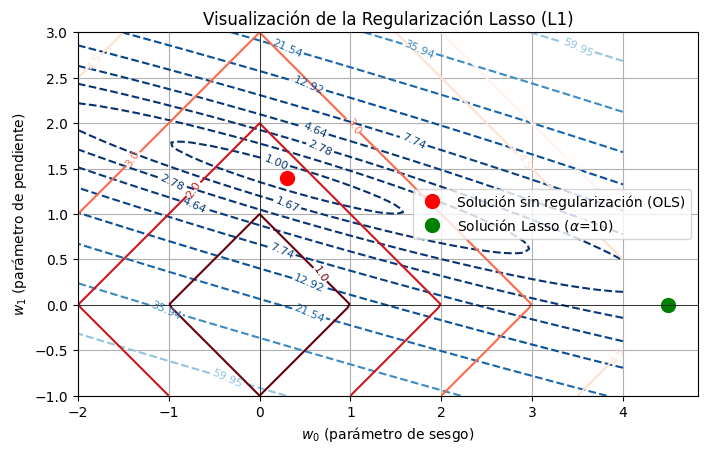

In [ ]:
from sklearn.linear_model import Lasso

# --- 1. Configuración del Problema ---

# Usamos los mismos datos para poder comparar
np.random.seed(42)
X = np.array([[1, 1.5], [1, 2.5], [1, 3.5], [1, 4.5]])
y = np.array([2, 5, 4, 7])

# Solución de Mínimos Cuadrados Ordinarios (sin regularización)
# Este será el centro de las elipses de error
w_ls = np.linalg.inv(X.T @ X) @ X.T @ y

# Parámetro de regularización (alpha es el análogo de lambda en scikit-learn)
alpha_reg = 10

# Solución de Lasso (no tiene fórmula cerrada, se usa un optimizador)
# El intercepto se calcula por separado en scikit-learn, ajustamos el modelo
X_features_only = X[:, 1:] # Usamos solo la característica, no la columna de unos
lasso_model = Lasso(alpha=alpha_reg, fit_intercept=True)
lasso_model.fit(X_features_only, y)
w_lasso = np.array([lasso_model.intercept_, lasso_model.coef_[0]])


# --- 2. Crear el Espacio de Parámetros ---

# Creamos una malla de puntos para w0 y w1
w0_vals = np.linspace(-2, 4, 100)
w1_vals = np.linspace(-1, 3, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# --- 3. Calcular el Error y la Regularización en la Malla ---

# Función de Error Cuadrático (MSE)
mse = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_ij = np.array([W0[i, j], W1[i, j]])
        mse[i, j] = np.mean((y - X @ w_ij)**2)

# Función de Regularización L1
l1_penalty = np.abs(W0) + np.abs(W1)

# --- 4. Graficar ---

plt.figure(figsize=(8, 8))
plt.grid(True)

# Graficar las curvas de nivel del Error (MSE)
contour_mse = plt.contour(W0, W1, mse, levels=np.logspace(0, 2, 10), cmap='Blues_r', linestyles='dashed')
plt.clabel(contour_mse, inline=1, fontsize=8)

# Crear y ordenar los niveles para la gráfica de contorno L1
l1_base_levels = [1, 2, 3, 5]
lasso_norm_level = np.abs(w_lasso[0]) + np.abs(w_lasso[1])
final_l1_levels = sorted(list(set(l1_base_levels + [lasso_norm_level])))

# Graficar las curvas de nivel de la Regularización (L1)
contour_l1 = plt.contour(W0, W1, l1_penalty, levels=final_l1_levels, cmap='Reds_r')
plt.clabel(contour_l1, inline=1, fontsize=8)

# Marcar los puntos importantes
plt.plot(w_ls[0], w_ls[1], 'ro', markersize=10, label='Solución sin regularización (OLS)')
plt.plot(w_lasso[0], w_lasso[1], 'go', markersize=10, label=f'Solución Lasso ($\\alpha$={alpha_reg})')

# Estilo del gráfico
plt.xlabel('$w_0$ (parámetro de sesgo)')
plt.ylabel('$w_1$ (parámetro de pendiente)')
plt.title('Visualización de la Regularización Lasso (L1)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

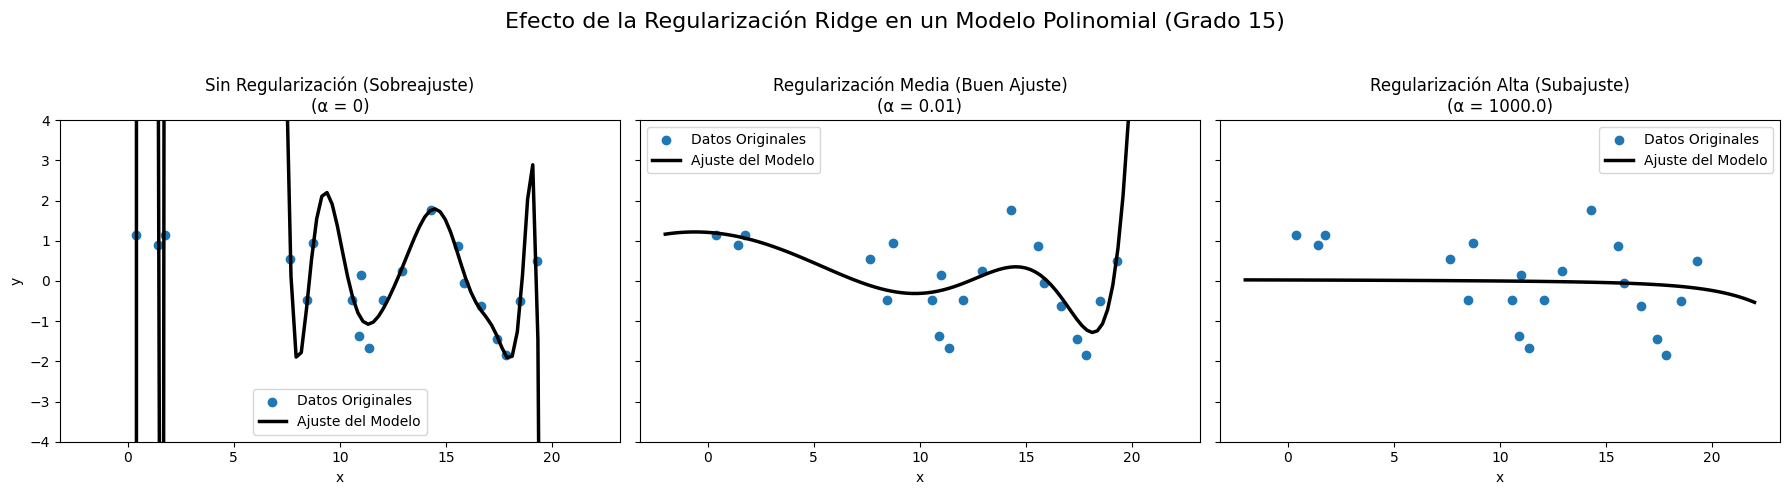

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# --- 1. Generar Datos Sintéticos (sin cambios) ---
np.random.seed(0)
n_samples = 20
X = np.sort(np.random.rand(n_samples) * 20)
y = np.sin(X) + np.random.randn(n_samples) * 0.5
X = X[:, np.newaxis]

# --- 2. Preparar el Lienzo y los Modelos ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Efecto de la Regularización Ridge en un Modelo Polinomial (Grado 15)', fontsize=16)

X_plot = np.linspace(-2, 22, 100)[:, np.newaxis]
polynomial_degree = 15

# --- NOVEDAD: Valores de alpha ajustados para un mayor contraste ---
regularization_params = [0, 1e-2, 1e3] # Cero, Pequeño, Muy Grande
titles = ['Sin Regularización (Sobreajuste)', 'Regularización Media (Buen Ajuste)', 'Regularización Alta (Subajuste)']

# --- 3. Entrenar y Graficar para cada Parámetro ---
for i, ax in enumerate(axs):
    alpha_value = regularization_params[i]

    # --- NOVEDAD: Añadimos StandardScaler al pipeline ---
    # El pipeline ahora es: 1. Polinomio -> 2. Escalar -> 3. Ridge
    model = make_pipeline(
        PolynomialFeatures(degree=polynomial_degree),
        StandardScaler(),
        Ridge(alpha=alpha_value, solver='cholesky')
    )

    model.fit(X, y)
    y_plot = model.predict(X_plot)

    ax.scatter(X, y, label='Datos Originales')
    ax.plot(X_plot, y_plot, color='black', linewidth=2.5, label='Ajuste del Modelo')
    ax.set_title(titles[i] + f'\n(α = {alpha_value})')
    ax.set_xlabel('x')
    ax.set_ylim(-4, 4)
    ax.legend()

axs[0].set_ylabel('y')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.937e+00, tolerance: 2.012e-03
  model = cd_fast.enet_coordinate_descent(


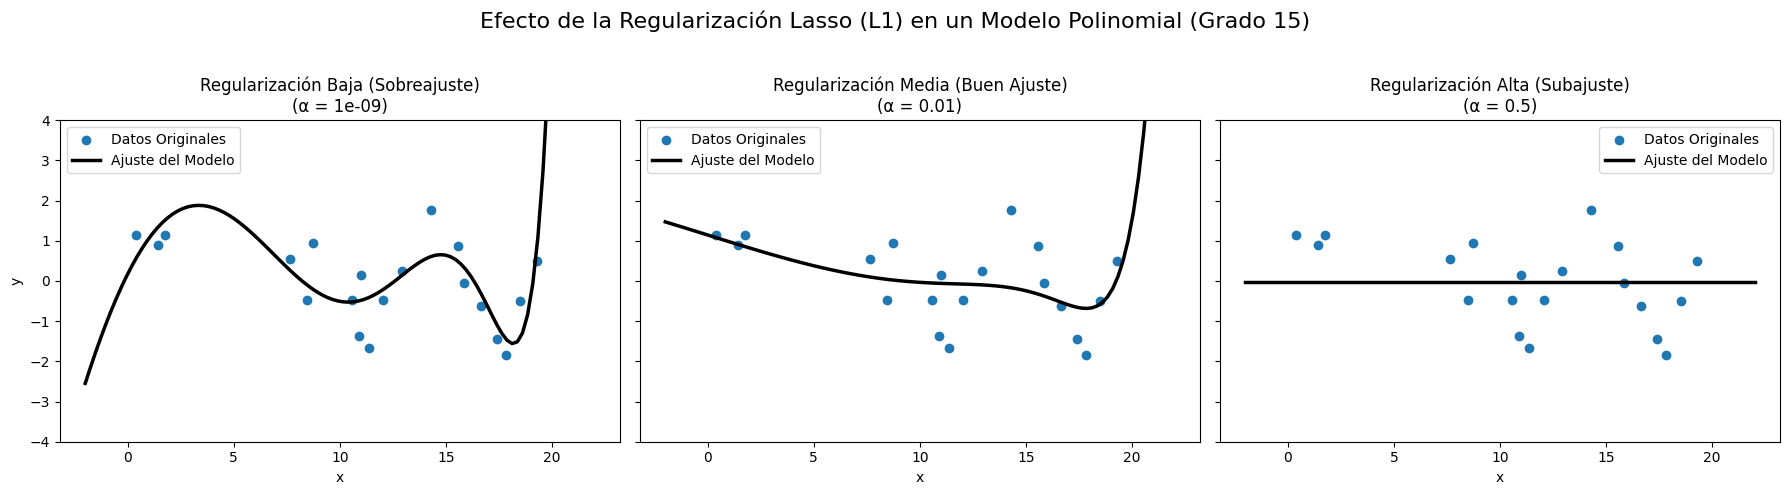

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# --- 1. Generar Datos Sintéticos (sin cambios) ---
np.random.seed(0)
n_samples = 20
X = np.sort(np.random.rand(n_samples) * 20)
y = np.sin(X) + np.random.randn(n_samples) * 0.5
X = X[:, np.newaxis]

# --- 2. Preparar el Lienzo y los Modelos ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Efecto de la Regularización Lasso (L1) en un Modelo Polinomial (Grado 15)', fontsize=16)

X_plot = np.linspace(-2, 22, 100)[:, np.newaxis]
polynomial_degree = 15

# --- NOVEDAD: Valores de alpha ajustados para Lasso ---
# Lasso es más sensible, por lo que usamos valores más pequeños.
regularization_params = [1e-9, 1e-2, 0.5] # Casi cero, Pequeño, Mediano-Alto
titles = ['Regularización Baja (Sobreajuste)', 'Regularización Media (Buen Ajuste)', 'Regularización Alta (Subajuste)']

# --- 3. Entrenar y Graficar para cada Parámetro ---
for i, ax in enumerate(axs):
    alpha_value = regularization_params[i]

    # --- NOVEDAD: Cambiamos Ridge por Lasso ---
    # El pipeline ahora es: 1. Polinomio -> 2. Escalar -> 3. Lasso
    model = make_pipeline(
        PolynomialFeatures(degree=polynomial_degree),
        StandardScaler(),
        Lasso(alpha=alpha_value, max_iter=50000) # Aumentamos max_iter para asegurar convergencia
    )

    model.fit(X, y)
    y_plot = model.predict(X_plot)

    ax.scatter(X, y, label='Datos Originales')
    ax.plot(X_plot, y_plot, color='black', linewidth=2.5, label='Ajuste del Modelo')
    ax.set_title(titles[i] + f'\n(α = {alpha_value})')
    ax.set_xlabel('x')
    ax.set_ylim(-4, 4)
    ax.legend()

axs[0].set_ylabel('y')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

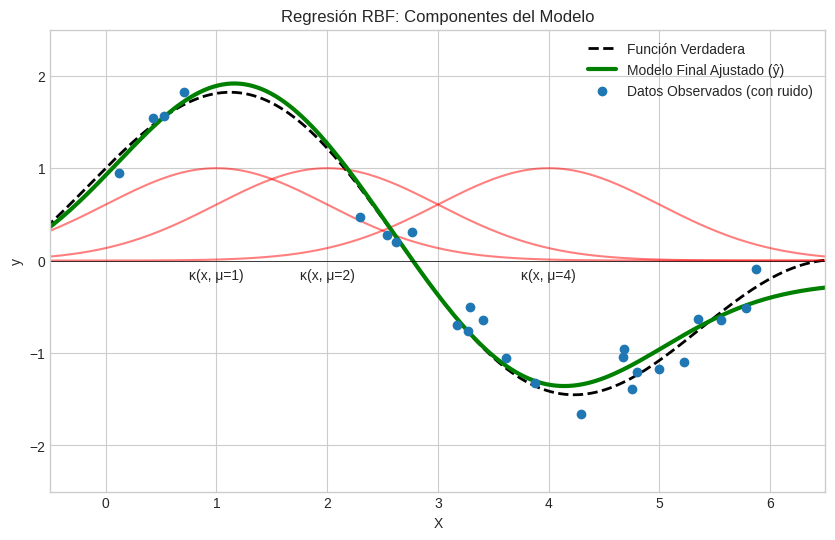

In [ ]:
# --- 1. Definir la "Función Verdadera" y generar datos ---
def true_fn(x):
    """La función real que intentamos aproximar."""
    return np.sin(x * 1.2) + np.cos(x * 0.5)

np.random.seed(0)
X = np.sort(np.random.rand(25) * 6)
# Los datos observados son la función verdadera + ruido
y = true_fn(X) + np.random.randn(len(X)) * 0.2
X = X.reshape(-1, 1)

# --- 2. Definir los parámetros de las RBF ---
centers = np.array([1, 2, 4]).reshape(-1, 1)
lambda_val = 2.0

def rbf_kernel(x, center, lambda_param):
    """Función del kernel RBF Gaussiano."""
    return np.exp(-(1 / lambda_param) * np.linalg.norm(x - center, axis=1)**2)

# --- 3. Transformar los datos y ajustar el modelo ---
phi_X = np.zeros((X.shape[0], len(centers)))
for i, center in enumerate(centers):
    phi_X[:, i] = rbf_kernel(X, center, lambda_val)

model = LinearRegression()
model.fit(phi_X, y)
thetas = model.coef_
intercept = model.intercept_

# --- 4. Graficar todos los componentes ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

X_plot = np.linspace(-1, 7, 200).reshape(-1, 1)

# a) Graficar la Función Verdadera (nuestro objetivo)
ax.plot(X_plot, true_fn(X_plot), color='black', linestyle='--', linewidth=2, label='Función Verdadera')

# b) Graficar las funciones de base RBF sin ponderar (curvas rojas)
for i, center in enumerate(centers):
    rbf_values = rbf_kernel(X_plot, center, lambda_val)
    ax.plot(X_plot, rbf_values, color='red', alpha=0.5, linewidth=1.5, linestyle='-')
    ax.text(center[0], -0.2, f'κ(x, μ={center[0]})', ha='center')

# c) Graficar el modelo final ajustado (curva verde)
phi_plot = np.zeros((X_plot.shape[0], len(centers)))
for i, center in enumerate(centers):
    phi_plot[:, i] = rbf_kernel(X_plot, center, lambda_val)
y_plot = phi_plot @ thetas + intercept
ax.plot(X_plot, y_plot, color='green', linewidth=3, label='Modelo Final Ajustado (ŷ)')

# d) Graficar los datos originales (puntos azules)
ax.scatter(X, y, label='Datos Observados (con ruido)', zorder=5)

# e) Anotaciones y estilo
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Regresión RBF: Componentes del Modelo')
ax.legend(loc='upper right')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-2.5, 2.5)

plt.show()

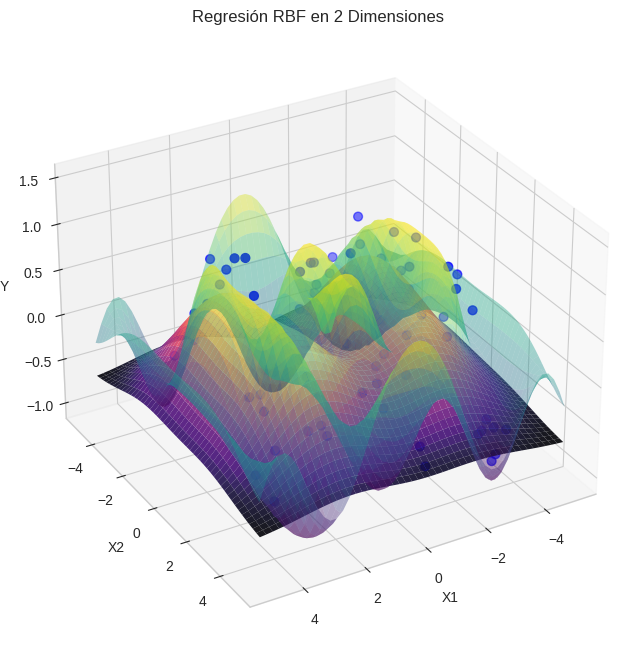

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Definir la "Superficie Verdadera" y generar datos ---
def true_fn_2d(x1, x2):
    """La superficie real que intentamos aproximar."""
    # Crea una superficie ondulada
    r = np.sqrt(x1**2 + x2**2)
    return np.sin(r * 1.5) * np.cos(x1)

np.random.seed(42)
n_samples = 100
# Generamos puntos (x1, x2) aleatorios en un plano
X = np.random.rand(n_samples, 2) * 8 - 4
y = true_fn_2d(X[:, 0], X[:, 1]) + np.random.randn(n_samples) * 0.3

# --- 2. Definir los parámetros de las RBF en 2D ---
# Centros de los kernels en el plano (x1, x2)
centers = np.array([
    [-2, -2], [0, -2], [2, -2],
    [-2, 0],  [0, 0],  [2, 0],
    [-2, 2],  [0, 2],  [2, 2]
])
lambda_val = 5.0

def rbf_kernel_2d(x, center, lambda_param):
    """Función del kernel RBF Gaussiano para entradas 2D."""
    # np.linalg.norm calcula la distancia Euclidiana
    return np.exp(-(1 / lambda_param) * np.linalg.norm(x - center, axis=1)**2)

# --- 3. Transformar los datos y ajustar el modelo ---
phi_X = np.zeros((X.shape[0], len(centers)))
for i, center in enumerate(centers):
    phi_X[:, i] = rbf_kernel_2d(X, center, lambda_val)

model = LinearRegression()
model.fit(phi_X, y)

# --- 4. Preparar la malla para graficar las superficies ---
x1_plot = np.linspace(-5, 5, 50)
x2_plot = np.linspace(-5, 5, 50)
X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
# Aplanar la malla para poder hacer predicciones
X_plot_flat = np.c_[X1_plot.ravel(), X2_plot.ravel()]

# Calcular la superficie RBF ajustada
phi_plot = np.zeros((X_plot_flat.shape[0], len(centers)))
for i, center in enumerate(centers):
    phi_plot[:, i] = rbf_kernel_2d(X_plot_flat, center, lambda_val)
y_plot = model.predict(phi_plot).reshape(X1_plot.shape)

# Calcular la superficie verdadera
y_true_plot = true_fn_2d(X1_plot, X2_plot)


# --- 5. Graficar en 3D ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# a) Graficar la superficie verdadera (semitransparente)
ax.plot_surface(X1_plot, X2_plot, y_true_plot, alpha=0.4, cmap='viridis', label='Superficie Verdadera')

# b) Graficar la superficie ajustada por el modelo RBF
ax.plot_surface(X1_plot, X2_plot, y_plot, alpha=0.9, cmap='magma', label='Superficie Ajustada RBF')

# c) Graficar los puntos de datos originales
ax.scatter(X[:, 0], X[:, 1], y, c='blue', s=40, depthshade=True, label='Datos Observados')

# d) Estilo del gráfico
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Regresión RBF en 2 Dimensiones')
ax.view_init(elev=30, azim=60) # Ajustar el ángulo de la vista
plt.show()

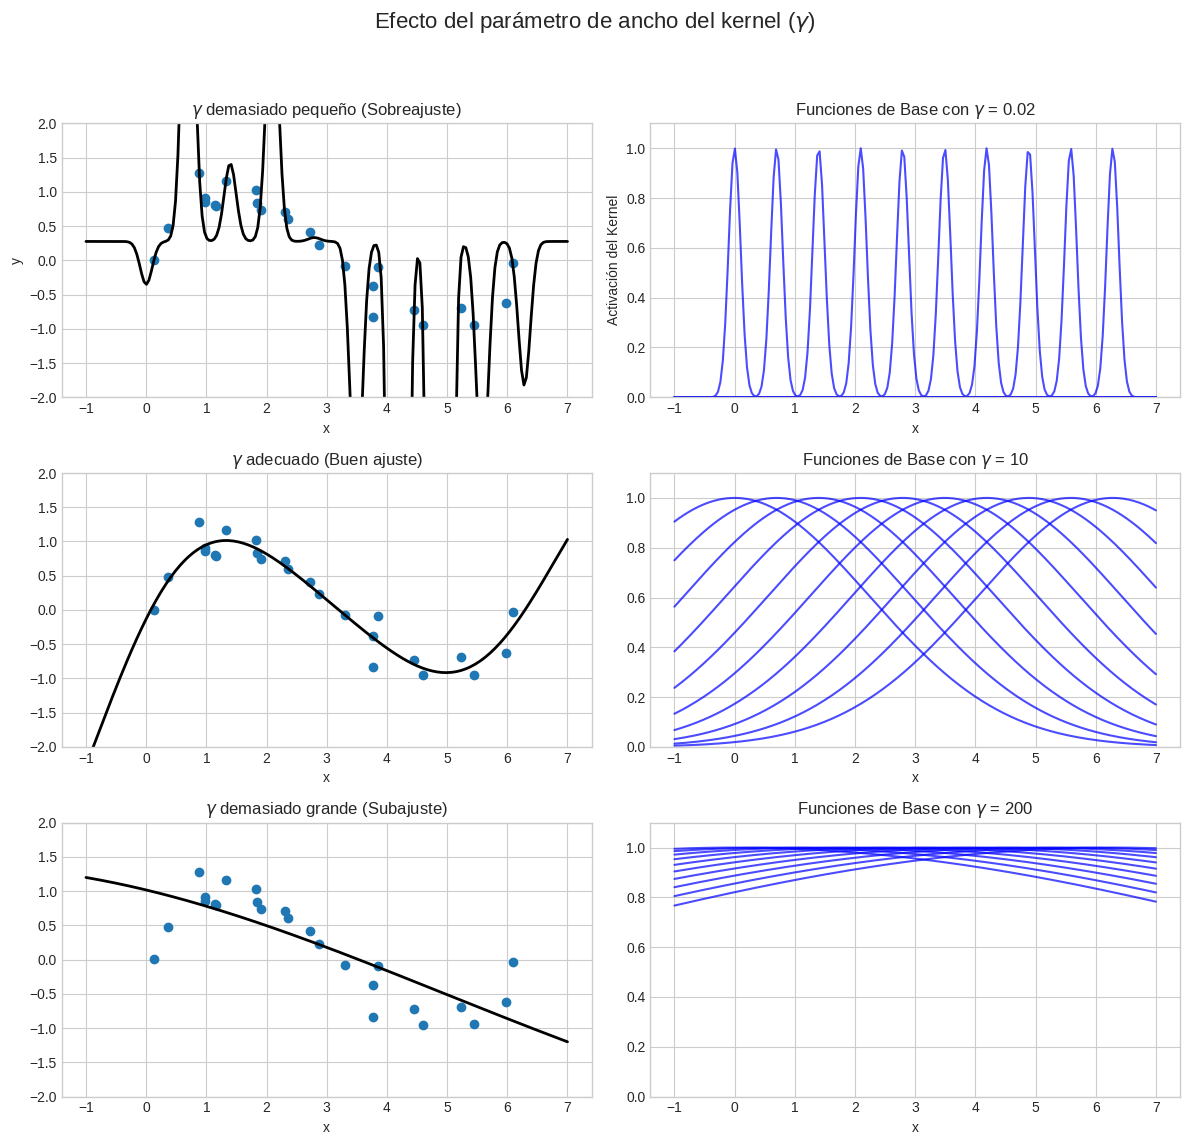

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# --- 1. Generar datos en un rango más estándar (0 a 2*pi) ---
np.random.seed(42)
X = np.sort(np.random.rand(25) * 2 * np.pi) # Rango de 0 a 2*pi
y = np.sin(X) + np.random.randn(len(X)) * 0.2
X = X.reshape(-1, 1)

# --- 2. Definir parámetros para el experimento ---
# Centros (μ) distribuidos en el nuevo rango
centers = np.linspace(0, 2 * np.pi, 10).reshape(-1, 1)

# Valores de lambda ajustados para el nuevo rango
lambda_values = [0.02, 10, 200] # Pequeño, Mediano, Grande
titles = ["$\gamma$ demasiado pequeño (Sobreajuste)", "$\gamma$ adecuado (Buen ajuste)", "$\gamma$ demasiado grande (Subajuste)"]

# Puntos para dibujar curvas suaves
X_plot = np.linspace(-1, 7, 200).reshape(-1, 1)

# Función del kernel RBF Gaussiano
def rbf_kernel(x, center, lambda_param):
    return np.exp(-(np.linalg.norm(x - center, axis=1)**2) / lambda_param)

# --- 3. Crear la figura y los subplots ---
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Efecto del parámetro de ancho del kernel ($\gamma$)", fontsize=16)

# --- 4. Iterar sobre cada valor de lambda y graficar ---
for i, lambda_val in enumerate(lambda_values):
    ax_fit = axs[i, 0]
    ax_kernels = axs[i, 1]

    # --- Columna derecha: Graficar los kernels de base ---
    for center in centers:
        kernel_values = rbf_kernel(X_plot, center, lambda_val)
        ax_kernels.plot(X_plot, kernel_values, color='blue', alpha=0.7)
    ax_kernels.set_title(f"Funciones de Base con $\gamma$ = {lambda_val}")
    ax_kernels.set_ylim(0, 1.1)
    ax_kernels.set_xlabel("x")
    if i == 0: ax_kernels.set_ylabel("Activación del Kernel")

    # --- Columna izquierda: Ajustar el modelo y graficar ---
    phi_X = np.zeros((X.shape[0], len(centers)))
    for j, center in enumerate(centers):
        phi_X[:, j] = rbf_kernel(X, center, lambda_val)

    # NOVEDAD: Usamos Ridge para estabilidad numérica
    # Un alpha muy pequeño (1e-6) solo para estabilizar la solución
    model = Ridge(alpha=1e-6)
    model.fit(phi_X, y)

    # Predecir sobre la curva suave
    phi_plot = np.zeros((X_plot.shape[0], len(centers)))
    for j, center in enumerate(centers):
        phi_plot[:, j] = rbf_kernel(X_plot, center, lambda_val)
    y_plot = model.predict(phi_plot)

    # Graficar datos y ajuste
    ax_fit.scatter(X, y)
    ax_fit.plot(X_plot, y_plot, color='black', linewidth=2)
    ax_fit.set_title(titles[i])
    ax_fit.set_ylim(-2, 2)
    ax_fit.set_xlabel("x")
    if i == 0: ax_fit.set_ylabel("y")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()